In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

df = pd.read_csv("titanic-passengers.csv", sep=';')#This line reads the csvfile "titanic-passengers.csv" into a Pandas DataFrame called 'df'.


In [2]:
#quick overview of the data.
df.info()
df.head()
df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S
890,428,Yes,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0000,NaN,S


In [3]:
#This line calculates and prints the count of missing values (NaN) in each column of the DataFrame 'df'.
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#for 'age'
print(df["Age"].value_counts())#This prints the frequency of the values
df["Age"].fillna(24,inplace=True)# filling missing values

#for'Cabin'
print(df["Cabin"].value_counts())
df["Cabin"].fillna('G6',inplace=True)

#for 'Embarked'
print(df["Embarked"].value_counts())
df["Embarked"].fillna('S',inplace=True)



24.0    30
22.0    27
18.0    26
28.0    25
19.0    25
        ..
36.5     1
55.5     1
34.5     1
14.5     1
23.5     1
Name: Age, Length: 88, dtype: int64
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


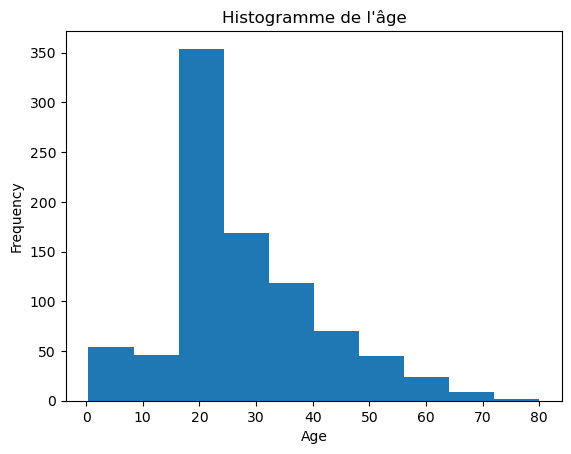

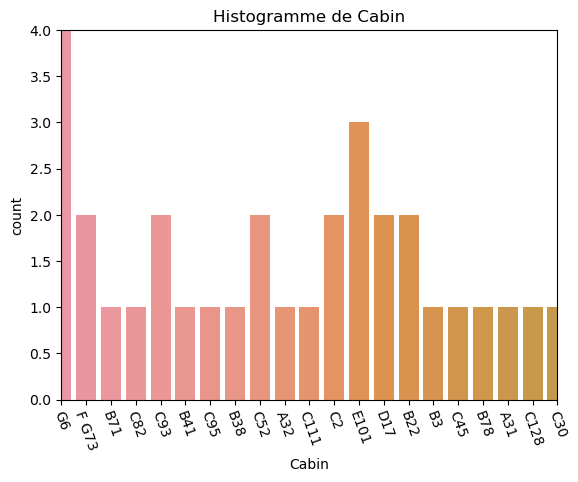

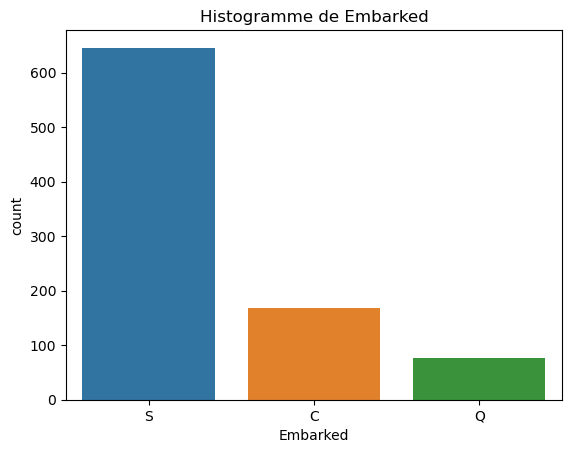

In [5]:
#Affichage
#as Age contains numerical values we can trace it's histoograme 
df['Age'].plot.hist()#This line creates a histogram plot of the "Age" column in the DataFrame 'df'.
plt.xlabel('Age')  # Ajoutez une étiquette à l'axe des x 
plt.title('Histogramme de l\'âge')  # Ajoutez un titre 
plt.show()#Displays the histogram.

#as 'Cabin' contains categorical values we create it's barplot using Seaborn
sns.countplot(x= 'Cabin',data=df)
plt.ylim(0,4)
plt.xlim(0,20)#there are too many values for cabin
plt.xlabel('Cabin') 
plt.title('Histogramme de Cabin')
plt.xticks(rotation=-70)
plt.show()

#as 'Embarked' contains categorical values we create it's barplot using Seaborn
sns.countplot(x= 'Embarked',data=df)
plt.xlabel('Embarked')  # Ajoutez une étiquette à l'axe des x 
plt.title('Histogramme de Embarked')
plt.show()


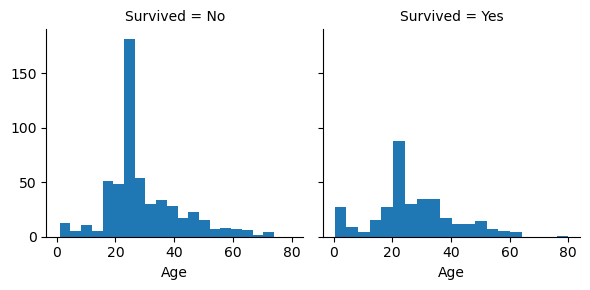

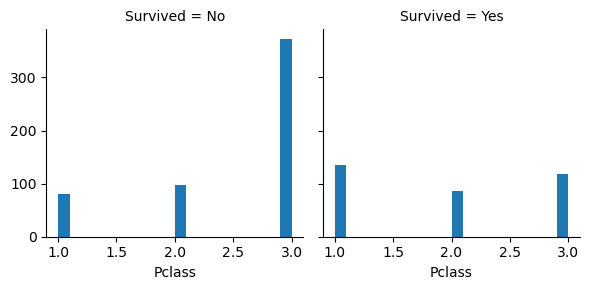

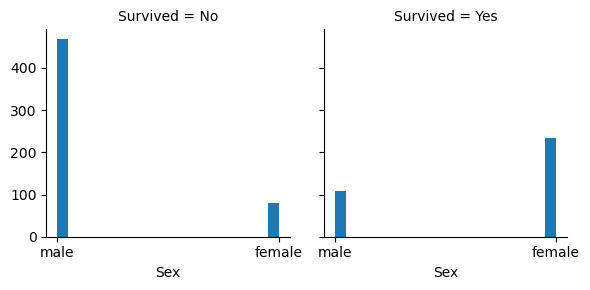

In [10]:
#correlation:
#correlation between Survived and Age using seaborn
g=sns.FacetGrid(df,col='Survived')#This graphic allows you to explore the age distribution of passengers based on their survival status, as the figure show we can see that most people between 20 and 30 years old did not survive
g.map(plt.hist,'Age',bins=20)

#correlation between Survived and Pclass using seaborn
g=sns.FacetGrid(df,col='Survived')#in this figure it appears that most of the people from third class did not survive.
g.map(plt.hist,'Pclass',bins=20)

##correlation between Survived and Pclass using seaborn
g=sns.FacetGrid(df,col='Survived')#we observe a high percentage of deaths among males
g.map(plt.hist,'Sex',bins=20)


##conclusion: Passengers in first and second-class cabins had better access to lifeboats, and they were often located closer to the upper decks where lifeboats were launched.
#Third-class passengers, who were predominantly immigrants, had a lower survival rate.
#The most significant factor in survival on the Titanic was gender. Women and children were given priority in the lifeboats, and as a result, a higher percentage of women survived compared to men.

In [9]:
 #deleting colums:
 df = df.drop('Name', axis=1)
 df = df.drop('Ticket', axis=1)
 df = df.drop('Parch', axis=1)
 df = df.drop('Fare', axis=1)
 df = df.drop('PassengerId', axis=1)
 df = df.drop('SibSp', axis=1)
 

In [7]:
#convertion of categorical values into numerical values
#for'Survived'
cleanup={'Survived':{"Yes":1,"No":0}}
df.replace(cleanup,inplace=True)
#for'Sex'
cleanup={'Sex':{"male":1,"female":0}}
df.replace(cleanup,inplace=True)



C:\Users\YM\AppData\Local\Temp\ipykernel_11836\1206507127.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
C:\Users\YM\AppData\Local\Temp\ipykernel_11836\1206507127.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


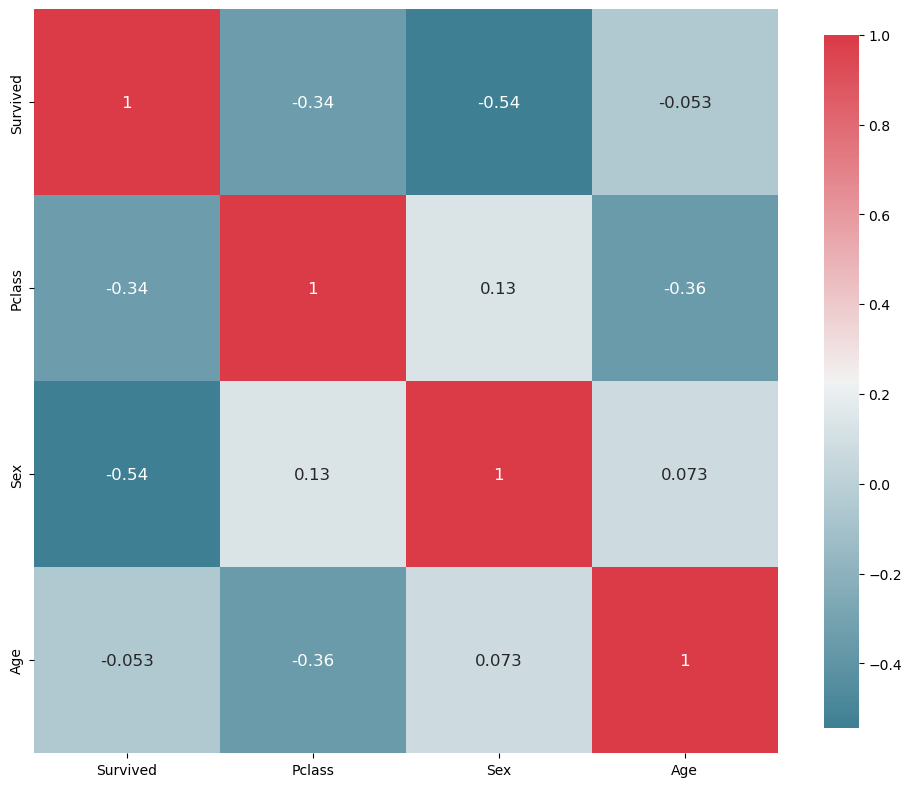

In [10]:
#heat_map to visualize the correlation between variables
def plot_correlation_map(df):
    corr = df.corr()
    s, ax = plt.subplots(figsize=(12, 10))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    s = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize': 12})

plot_correlation_map(df)
corr = df.corr()
# Heatmaps are commonly used to display correlation matrices. They help identify which variables are strongly related to one another. 
#from this heat-map we can observe a high correlation between sex and survival and pclass and survival but a rather low correlation between age and survival,
#as it is known that women children and first classes were given priority when it came to lifeboats

